# mdviz Tutorial: MD Trajectory Analysis Made Easy

This notebook demonstrates how to use **mdviz** for molecular dynamics trajectory analysis.

## What is mdviz?

mdviz is a user-friendly Python toolkit for MD trajectory analysis that provides:
- Simple API for trajectory loading and preprocessing
- Built-in PCA & clustering algorithms
- Interactive visualizations
- Export options for representative structures

## Installation

```bash
pip install -e .
```

## Quick Start

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import mdviz components
try:
    from mdviz import ClusterAnalyzer, Visualizer
    print("✅ mdviz imported successfully!")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Please install the required dependencies.")

✅ mdviz imported successfully!


## Demo with Synthetic Data

Since we may not have actual MD trajectory files, let's create some synthetic data that mimics a real trajectory analysis.

In [ ]:
def create_synthetic_trajectory_data(n_frames=1000, n_components=3):
    """
    Create synthetic trajectory data that mimics real MD simulation results.
    
    This simulates a protein with three conformational states.
    """
    np.random.seed(42)
    
    # Define three conformational states
    state_centers = {
        'closed': [0, 0, 0],
        'open': [3, 2, -1],
        'intermediate': [-1, 3, 2]
    }
    
    # State populations (closed is most stable)
    state_probs = [0.5, 0.3, 0.2]
    
    # Generate data points
    states = np.random.choice(['closed', 'open', 'intermediate'], 
                             size=n_frames, p=state_probs)
    
    data = []
    true_labels = []
    
    for i, state in enumerate(states):
        center = state_centers[state]
        
        # Add some noise and state-specific variance
        if state == 'closed':
            noise = np.random.normal(0, 0.5, n_components)
        elif state == 'open':
            noise = np.random.normal(0, 0.8, n_components)
        else:  # intermediate
            noise = np.random.normal(0, 1.0, n_components)
        
        point = np.array(center[:n_components]) + noise
        data.append(point)
        true_labels.append(state)
    
    pca_coords = np.array(data)
    
    # Generate corresponding RMSD values
    rmsd_base = 2.0
    rmsd_values = []
    
    for state in states:
        if state == 'closed':
            rmsd = rmsd_base + np.random.normal(0, 0.3)
        elif state == 'open':
            rmsd = rmsd_base + 1.5 + np.random.normal(0, 0.5)
        else:  # intermediate
            rmsd = rmsd_base + 0.8 + np.random.normal(0, 0.4)
        
        rmsd_values.append(max(0.1, rmsd))  # Ensure positive RMSD
    
    return pca_coords, np.array(rmsd_values), true_labels

# Generate synthetic data
pca_coords, rmsd_values, true_labels = create_synthetic_trajectory_data()

print("Generated synthetic trajectory data:")
print(f"  • {len(pca_coords)} frames")
print(f"  • {pca_coords.shape[1]} principal components")
print(f"  • RMSD range: {np.min(rmsd_values):.2f} - {np.max(rmsd_values):.2f} Å")
print(f"  • True states: {set(true_labels)}")

Generated synthetic trajectory data:
  • 1000 frames
  • 3 principal components
  • RMSD range: 1.05 - 4.91 Å
  • True states: {np.str_('intermediate'), np.str_('closed'), np.str_('open')}


## Clustering Analysis

Now let's use mdviz to perform clustering analysis on our synthetic trajectory.

In [3]:
# Initialize cluster analyzer
try:
    cluster_analyzer = ClusterAnalyzer(
        data=pca_coords,
        feature_names=['PC1', 'PC2', 'PC3']
    )
    print("✅ ClusterAnalyzer initialized successfully!")
except Exception as e:
    print(f"❌ Error initializing ClusterAnalyzer: {e}")
    cluster_analyzer = None

✅ ClusterAnalyzer initialized successfully!


In [4]:
if cluster_analyzer:
    # Find optimal number of clusters
    print("Finding optimal number of clusters...")
    
    try:
        optimal_k, scores = cluster_analyzer.find_optimal_k(k_range=range(2, 8))
        print(f"\n📊 Optimal number of clusters: {optimal_k}")
        print(f"   Best silhouette score: {max(scores['silhouette']):.3f}")
    except Exception as e:
        print(f"❌ Error finding optimal k: {e}")
        optimal_k = 3  # Use default

Finding optimal number of clusters...
Data standardized for clustering
Optimal k found: 3 (method: silhouette)

📊 Optimal number of clusters: 3
   Best silhouette score: 0.579
Optimal k found: 3 (method: silhouette)

📊 Optimal number of clusters: 3
   Best silhouette score: 0.579


In [5]:
if cluster_analyzer:
    # Perform clustering with optimal k
    print(f"Performing K-means clustering with k={optimal_k}...")
    
    try:
        cluster_labels = cluster_analyzer.kmeans_clustering(n_clusters=optimal_k)
        
        print("\n🎯 Clustering completed!")
        print("   Number of clusters found: {len(np.unique(cluster_labels))}")
        
        # Show cluster populations
        unique_labels, counts = np.unique(cluster_labels, return_counts=True)
        print("\n📈 Cluster populations:")
        for label, count in zip(unique_labels, counts):
            percentage = 100 * count / len(cluster_labels)
            print(f"   Cluster {label}: {count:4d} frames ({percentage:5.1f}%)")
            
    except Exception as e:
        print(f"❌ Error during clustering: {e}")
        cluster_labels = None

Performing K-means clustering with k=3...
K-means clustering completed with 3 clusters
Silhouette score: 0.579

🎯 Clustering completed!
   Number of clusters found: {len(np.unique(cluster_labels))}

📈 Cluster populations:
   Cluster 0:  515 frames ( 51.5%)
   Cluster 1:  190 frames ( 19.0%)
   Cluster 2:  295 frames ( 29.5%)


## Visualization

Let's create some visualizations to understand our trajectory better.

In [6]:
# Initialize visualizer
try:
    visualizer = Visualizer()
    print("✅ Visualizer initialized successfully!")
except Exception as e:
    print(f"❌ Error initializing Visualizer: {e}")
    visualizer = None

✅ Visualizer initialized successfully!


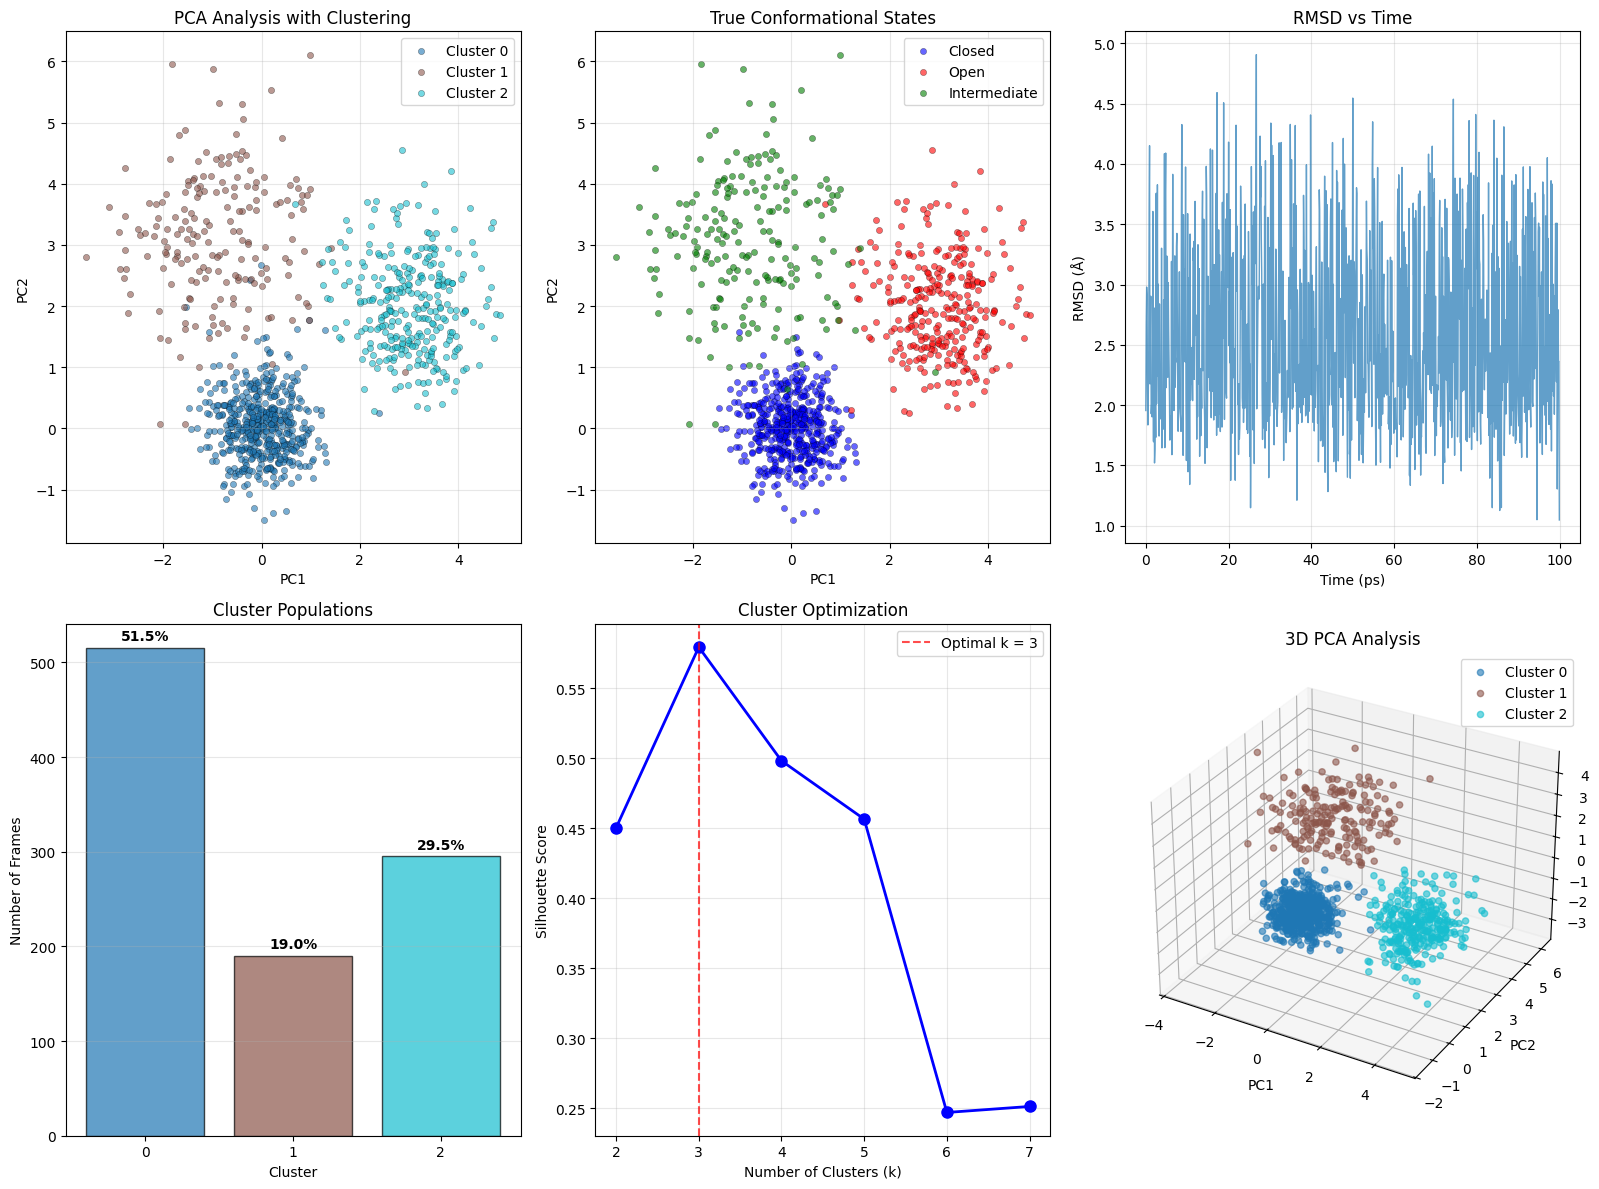


📊 Visualization complete! Saved as 'mdviz_tutorial_results.png'


In [ ]:
# Create comprehensive visualization
if cluster_labels is not None:
    
    plt.style.use('default')
    fig = plt.figure(figsize=(16, 12))
    
    # 1. PCA plot with clusters (2D)
    plt.subplot(2, 3, 1)
    
    unique_labels = np.unique(cluster_labels)
    colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(unique_labels)))
    
    for i, label in enumerate(unique_labels):
        mask = cluster_labels == label
        plt.scatter(pca_coords[mask, 0], pca_coords[mask, 1],
                   c=[colors[i]], label=f'Cluster {label}', 
                   alpha=0.6, s=20, edgecolors='black', linewidth=0.3)
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Analysis with Clustering')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. PCA plot with true states (for comparison)
    plt.subplot(2, 3, 2)
    
    state_colors = {'closed': 'blue', 'open': 'red', 'intermediate': 'green'}
    for state in ['closed', 'open', 'intermediate']:
        mask = np.array(true_labels) == state
        if np.any(mask):
            plt.scatter(pca_coords[mask, 0], pca_coords[mask, 1],
                       c=state_colors[state], label=f'{state.title()}',
                       alpha=0.6, s=20, edgecolors='black', linewidth=0.3)
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('True Conformational States')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. RMSD over time
    plt.subplot(2, 3, 3)
    
    time_values = np.arange(len(rmsd_values)) * 0.1  # 0.1 ps timestep
    plt.plot(time_values, rmsd_values, alpha=0.7, linewidth=1)
    plt.xlabel('Time (ps)')
    plt.ylabel('RMSD (Å)')
    plt.title('RMSD vs Time')
    plt.grid(True, alpha=0.3)
    
    # 4. Cluster populations
    plt.subplot(2, 3, 4)
    
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    bars = plt.bar(unique_labels.astype(str), counts, 
                  color=colors[:len(unique_labels)], alpha=0.7,
                  edgecolor='black', linewidth=1)
    
    # Add percentage labels
    for i, (label, count) in enumerate(zip(unique_labels, counts)):
        percentage = 100 * count / len(cluster_labels)
        plt.text(i, count + max(counts) * 0.01, f'{percentage:.1f}%',
                ha='center', va='bottom', fontweight='bold')
    
    plt.xlabel('Cluster')
    plt.ylabel('Number of Frames')
    plt.title('Cluster Populations')
    plt.grid(True, alpha=0.3, axis='y')
    
    # 5. Silhouette scores for different k values
    if 'scores' in locals():
        plt.subplot(2, 3, 5)
        
        plt.plot(scores['k_values'], scores['silhouette'], 'bo-', 
                linewidth=2, markersize=8)
        plt.axvline(optimal_k, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal k = {optimal_k}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Cluster Optimization')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 6. 3D PCA plot
    ax = fig.add_subplot(2, 3, 6, projection='3d')
    
    for i, label in enumerate(unique_labels):
        mask = cluster_labels == label
        ax.scatter(pca_coords[mask, 0], pca_coords[mask, 1], pca_coords[mask, 2],
                  c=[colors[i]], label=f'Cluster {label}', alpha=0.6, s=20)
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('3D PCA Analysis')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('mdviz_tutorial_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n📊 Visualization complete! Saved as 'mdviz_tutorial_results.png'")
    
else:
    print("❌ Cannot create visualizations - clustering failed")

## Analysis Summary

Let's generate a summary of our analysis results.

In [8]:
if cluster_analyzer and cluster_labels is not None:
    print("=" * 60)
    print("             TRAJECTORY ANALYSIS SUMMARY")
    print("=" * 60)
    
    # Basic statistics
    print("\n📈 BASIC STATISTICS:")
    print(f"   • Total frames analyzed: {len(pca_coords):,}")
    print(f"   • Principal components: {pca_coords.shape[1]}")
    print("   • RMSD statistics:")
    print(f"     - Mean: {np.mean(rmsd_values):.2f} ± {np.std(rmsd_values):.2f} Å")
    print(f"     - Range: {np.min(rmsd_values):.2f} - {np.max(rmsd_values):.2f} Å")
    
    # Clustering results
    print("\n🎯 CLUSTERING RESULTS:")
    print(f"   • Number of clusters: {len(np.unique(cluster_labels))}")
    print("   • Clustering method: K-means")
    print(f"   • Silhouette score: {cluster_analyzer.cluster_metrics.get('silhouette', 'N/A'):.3f}")
    
    # Cluster details
    print("\n📊 CLUSTER DETAILS:")
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    
    for label, count in zip(unique_labels, counts):
        percentage = 100 * count / len(cluster_labels)
        
        # Calculate cluster characteristics
        mask = cluster_labels == label
        cluster_rmsd = rmsd_values[mask]
        cluster_pca = pca_coords[mask]
        
        print(f"\n   Cluster {label}:")
        print(f"     - Population: {count:,} frames ({percentage:.1f}%)")
        print(f"     - RMSD: {np.mean(cluster_rmsd):.2f} ± {np.std(cluster_rmsd):.2f} Å")
        print(f"     - PC1 center: {np.mean(cluster_pca[:, 0]):.2f}")
        print(f"     - PC2 center: {np.mean(cluster_pca[:, 1]):.2f}")
        if pca_coords.shape[1] > 2:
            print(f"     - PC3 center: {np.mean(cluster_pca[:, 2]):.2f}")
    
    # Find representative frames
    print("\n🏆 REPRESENTATIVE FRAMES:")
    try:
        representatives = cluster_analyzer.get_representative_frames(n_representatives=1)
        for cluster_id, frame_indices in representatives.items():
            frame_idx = frame_indices[0]
            rmsd_val = rmsd_values[frame_idx]
            print(f"   • Cluster {cluster_id}: Frame {frame_idx} (RMSD = {rmsd_val:.2f} Å)")
    except Exception as e:
        print(f"   ❌ Error finding representatives: {e}")
    
    print("\n" + "=" * 60)
    print("Analysis completed successfully! 🎉")
    print("=" * 60)
    
else:
    print("❌ Cannot generate summary - analysis failed")

             TRAJECTORY ANALYSIS SUMMARY

📈 BASIC STATISTICS:
   • Total frames analyzed: 1,000
   • Principal components: 3
   • RMSD statistics:
     - Mean: 2.58 ± 0.76 Å
     - Range: 1.05 - 4.91 Å

🎯 CLUSTERING RESULTS:
   • Number of clusters: 3
   • Clustering method: K-means
   • Silhouette score: 0.579

📊 CLUSTER DETAILS:

   Cluster 0:
     - Population: 515 frames (51.5%)
     - RMSD: 2.00 ± 0.33 Å
     - PC1 center: -0.01
     - PC2 center: 0.05
     - PC3 center: 0.01

   Cluster 1:
     - Population: 190 frames (19.0%)
     - RMSD: 2.78 ± 0.38 Å
     - PC1 center: -0.89
     - PC2 center: 3.13
     - PC3 center: 2.07

   Cluster 2:
     - Population: 295 frames (29.5%)
     - RMSD: 3.48 ± 0.49 Å
     - PC1 center: 3.03
     - PC2 center: 2.01
     - PC3 center: -0.89

🏆 REPRESENTATIVE FRAMES:
   • Cluster 0: Frame 965 (RMSD = 1.91 Å)
   • Cluster 1: Frame 121 (RMSD = 2.75 Å)
   • Cluster 2: Frame 320 (RMSD = 2.75 Å)

Analysis completed successfully! 🎉


## Working with Real Trajectory Data

When you have real MD trajectory files, you can use mdviz like this:

In [ ]:
# Example with real trajectory files (uncomment when you have actual files)
"""
# Load real trajectory
analyzer = TrajectoryAnalyzer(
    topology="path/to/your/topology.psf",
    trajectory="path/to/your/trajectory.dcd",
    selection="protein and name CA"  # or any MDAnalysis selection
)

# Get trajectory information
info = analyzer.get_trajectory_info()
print(f"Loaded {info['n_frames']} frames with {info['n_atoms_selected']} atoms")

# Align trajectory and calculate RMSD
aligned_coords = analyzer.align_trajectory(reference_frame=0)
rmsd_values = analyzer.calculate_rmsd(reference_frame=0)

# Perform PCA
pca_coords, pca_model = analyzer.perform_pca(n_components=3)

# Clustering analysis
cluster_analyzer = ClusterAnalyzer(pca_coords[:, :2])  # Use first 2 PCs
optimal_k, scores = cluster_analyzer.find_optimal_k()
cluster_labels = cluster_analyzer.kmeans_clustering(n_clusters=optimal_k)

# Export representative structures
representatives = cluster_analyzer.get_representative_frames()
for cluster_id, frame_indices in representatives.items():
    frame_idx = frame_indices[0]
    output_path = f"cluster_{cluster_id}_representative.pdb"
    analyzer.export_frame_pdb(frame_idx, output_path)

# Create interactive visualizations
visualizer = Visualizer()
fig_interactive = visualizer.plot_pca_2d(pca_coords[:, :2], cluster_labels, interactive=True)
fig_interactive.show()
"""

print("💡 Tips for working with real trajectory data:")
print("   • Use appropriate atom selections (e.g., 'protein and name CA' for backbone)")
print("   • Always align trajectories before PCA for meaningful results")
print("   • Start with 2-3 principal components for clustering")
print("   • Validate clustering results by examining representative structures")
print("   • Use interactive plots for detailed exploration")

## Conclusion

This tutorial demonstrated the key features of **mdviz**:

1. **Simple API**: Easy-to-use classes for trajectory analysis
2. **Flexible clustering**: Multiple algorithms with automatic optimization
3. **Rich visualizations**: Both static and interactive plots
4. **Representative structures**: Automatic identification and export
5. **Comprehensive analysis**: From raw trajectories to publication-ready results

### Next Steps

- Try mdviz with your own trajectory data
- Experiment with different clustering algorithms (DBSCAN, hierarchical)
- Explore 3D visualizations and interactive plots
- Customize atom selections for specific analyses

### Further Reading

- [MDAnalysis documentation](https://userguide.mdanalysis.org/)
- [Scikit-learn clustering guide](https://scikit-learn.org/stable/modules/clustering.html)
- [Plotly Python documentation](https://plotly.com/python/)

Happy analyzing! 🧬✨